<a href="https://colab.research.google.com/github/Muhammad-kaif2/machine_learning/blob/main/Power_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day31-power-transformer/concrete_data.csv'
df = pd.read_csv(url)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [ ]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.627553179231485

In [ ]:
cross_val_score(lr,X,y,cv=5,scoring='r2').mean()

np.float64(0.46099404916628606)

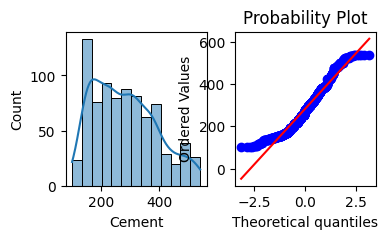

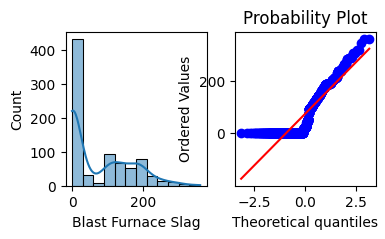

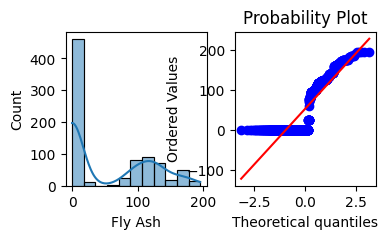

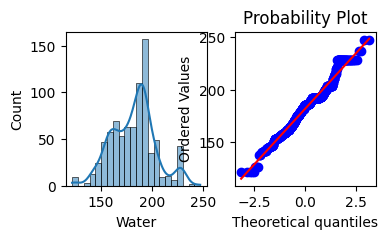

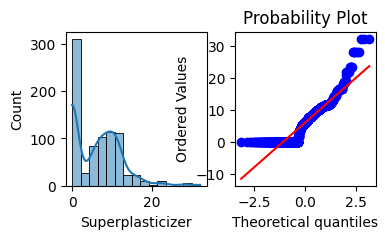

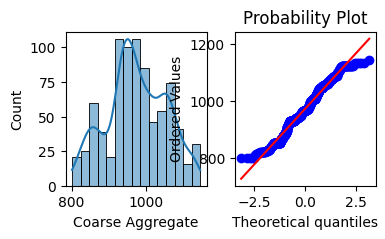

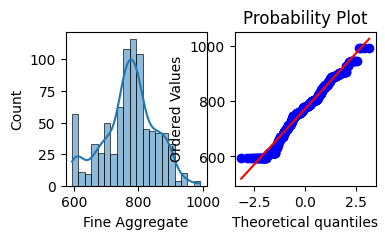

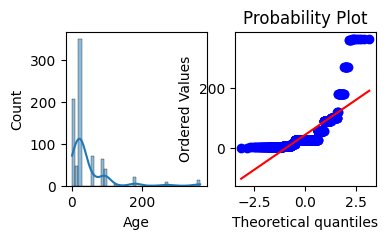

In [ ]:
for col in X_train.columns:
  plt.figure(figsize=(4,2))
  plt.subplot(121)
  sns.histplot(X_train[col], kde=True)

  plt.subplot(122)
  stats.probplot(X_train[col],dist='norm',plot=plt)
  plt.show()

In [ ]:
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train + 0.000001)
X_test_transformed = pt.transform(X_test + +0.000001)

In [ ]:
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [ ]:
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)
r2_score(y_test,y_pred)

0.8161906541864055

In [ ]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X + 0.000001)
cross_val_score(lr,X_transformed,y,cv=5,scoring='r2').mean()

np.float64(0.6662950329054064)

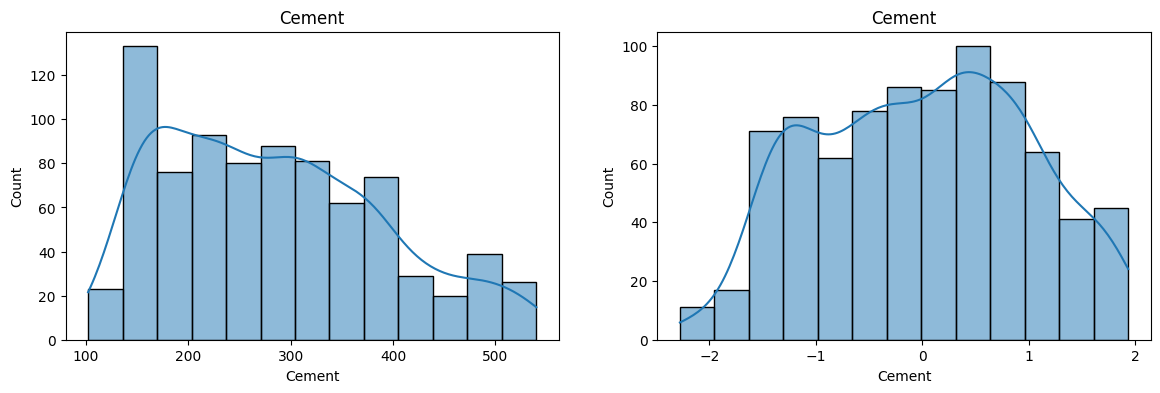

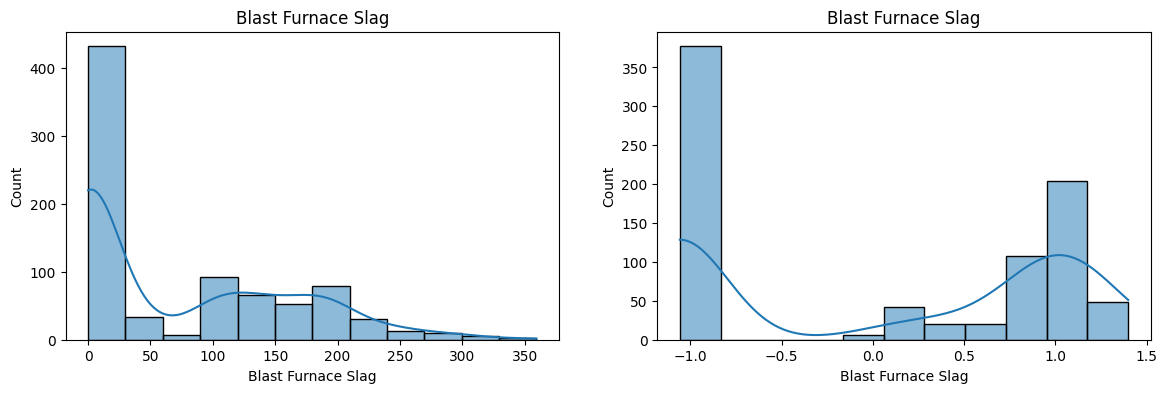

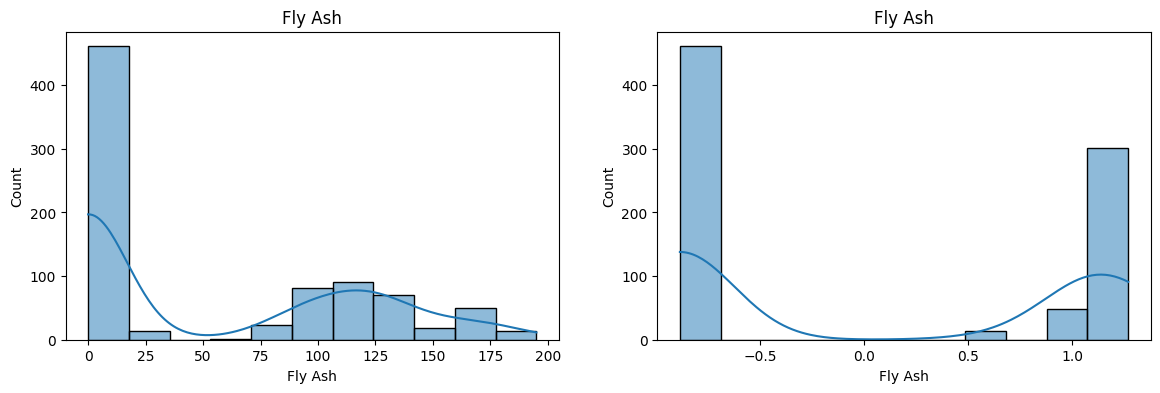

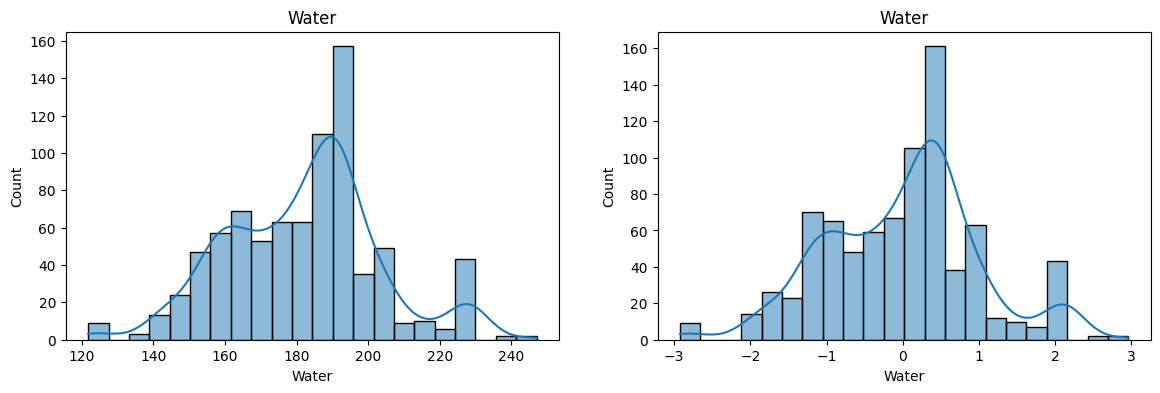

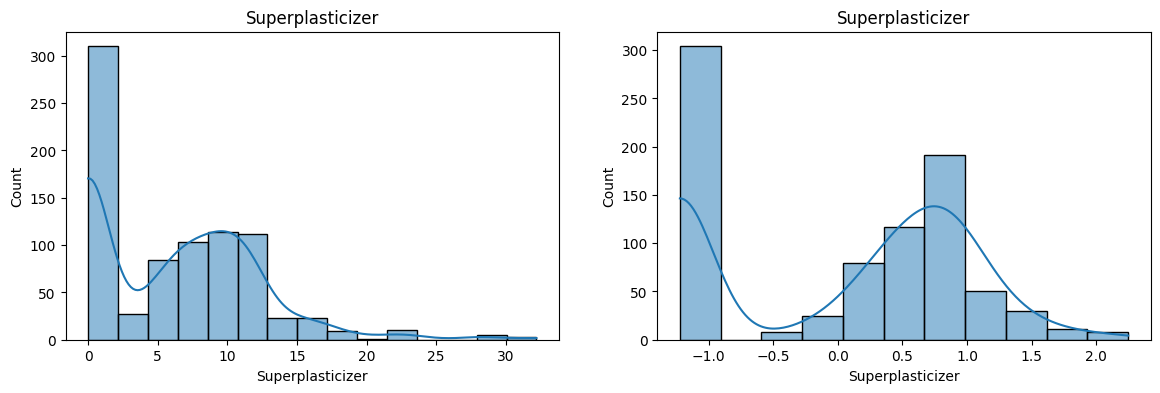

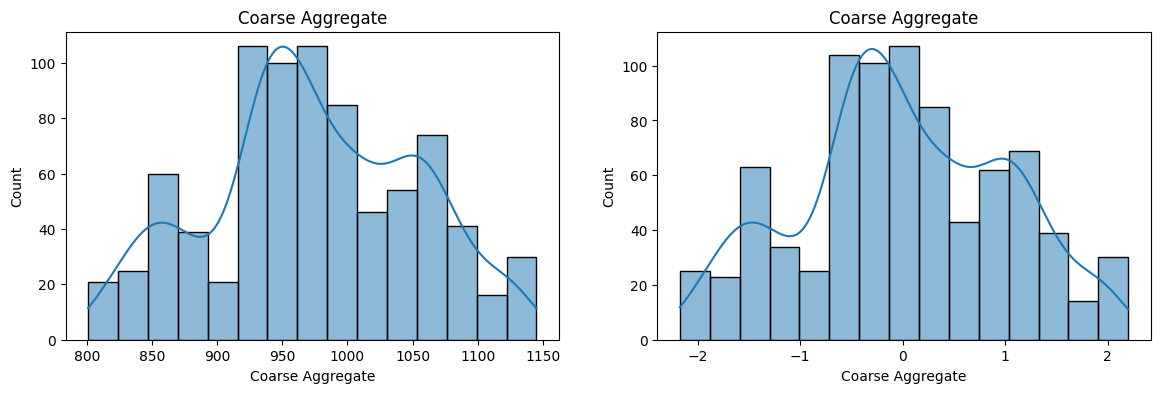

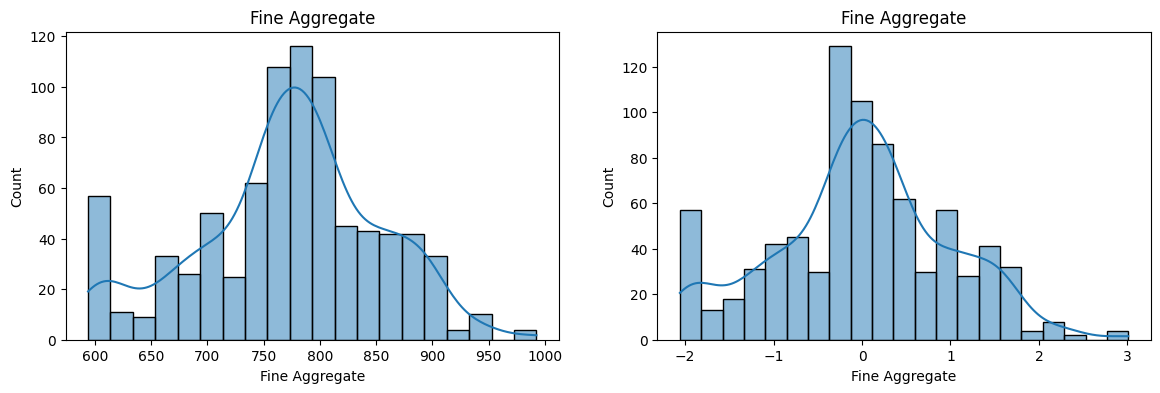

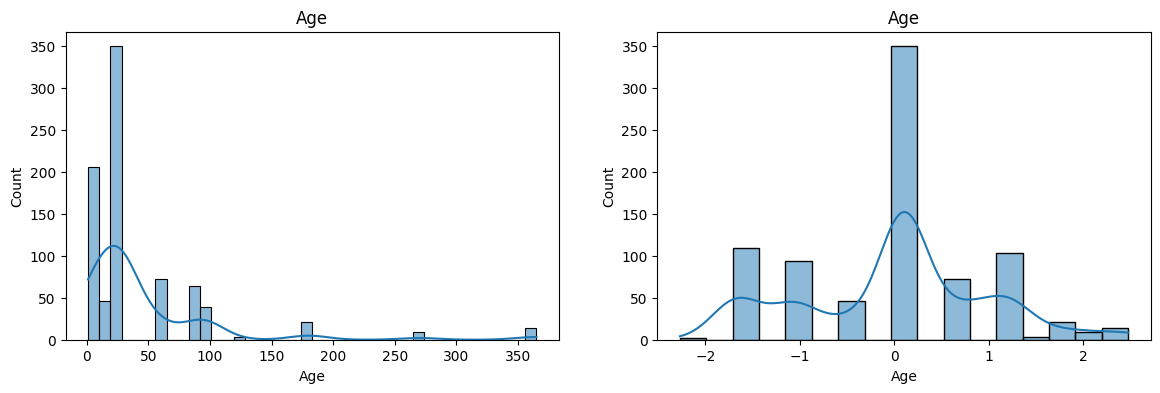

In [ ]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed[col],kde=True)
    plt.title(col)

    plt.show()

In [ ]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906512004999


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [ ]:
pt2 = PowerTransformer(method='yeo-johnson')

X_train_transformed2 = pt2.fit_transform(X)
cross_val_score(lr,X_train_transformed2,y,cv=5,scoring='r2').mean()

np.float64(0.6834625141500866)

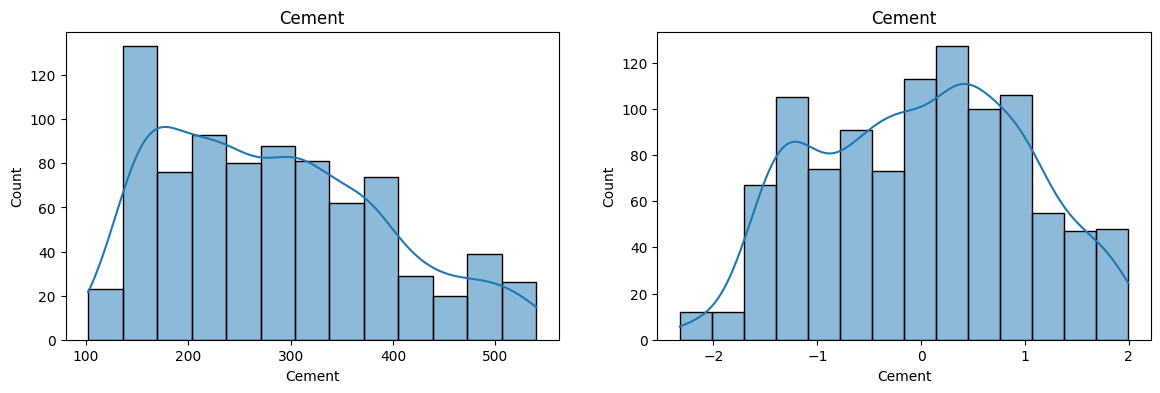

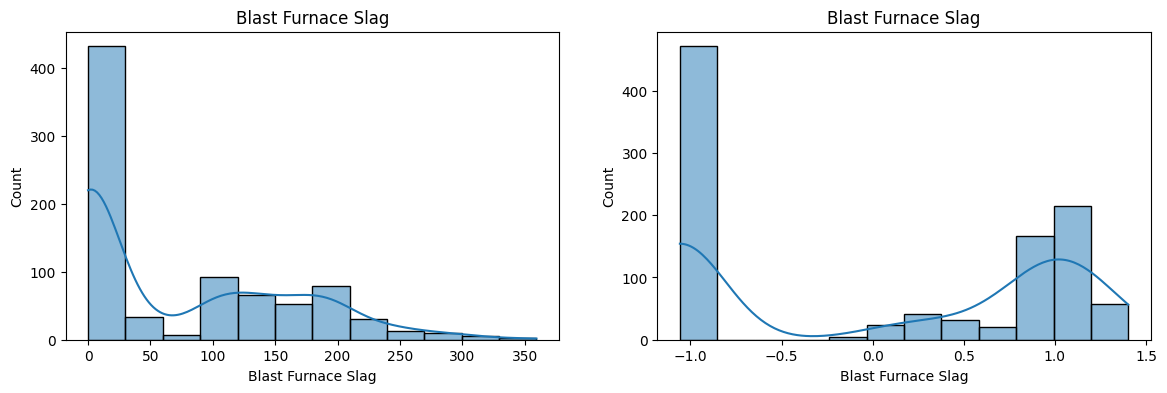

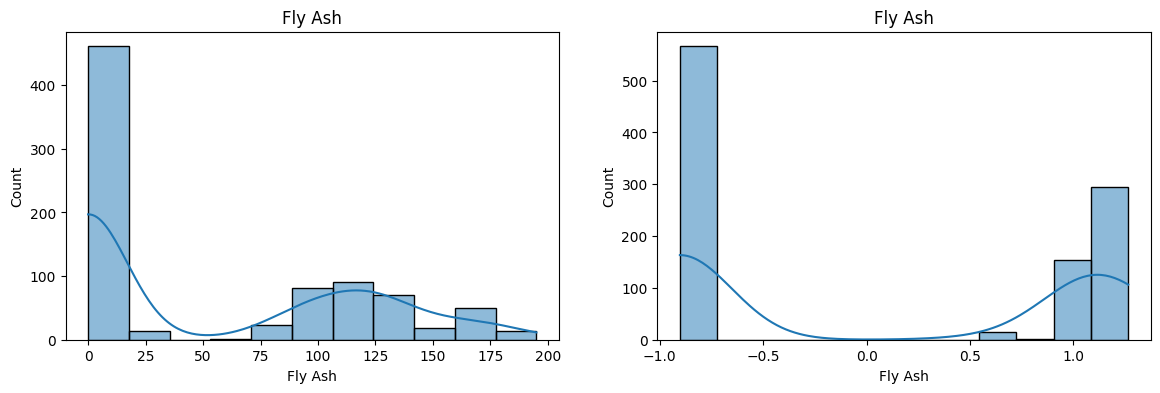

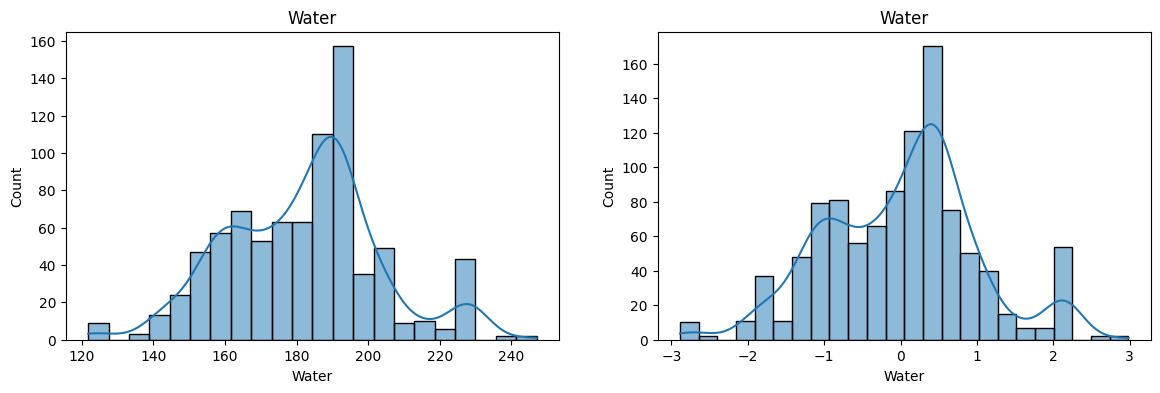

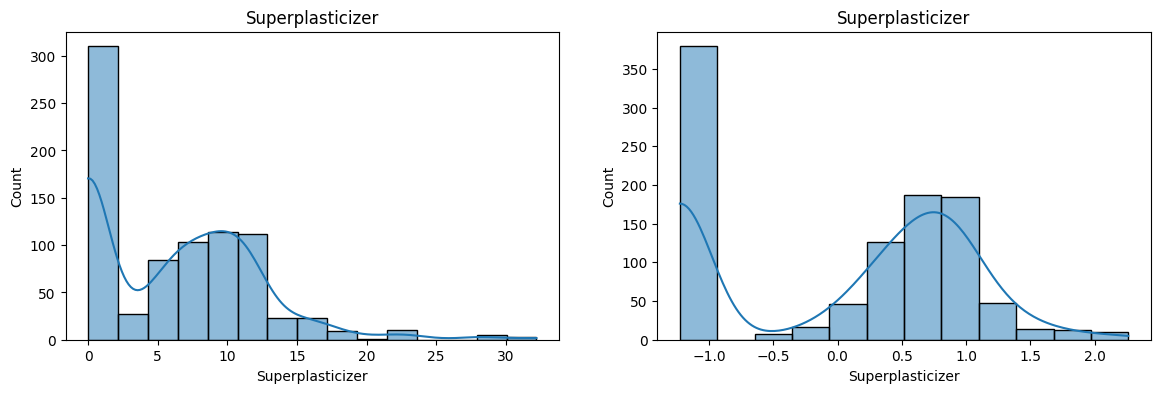

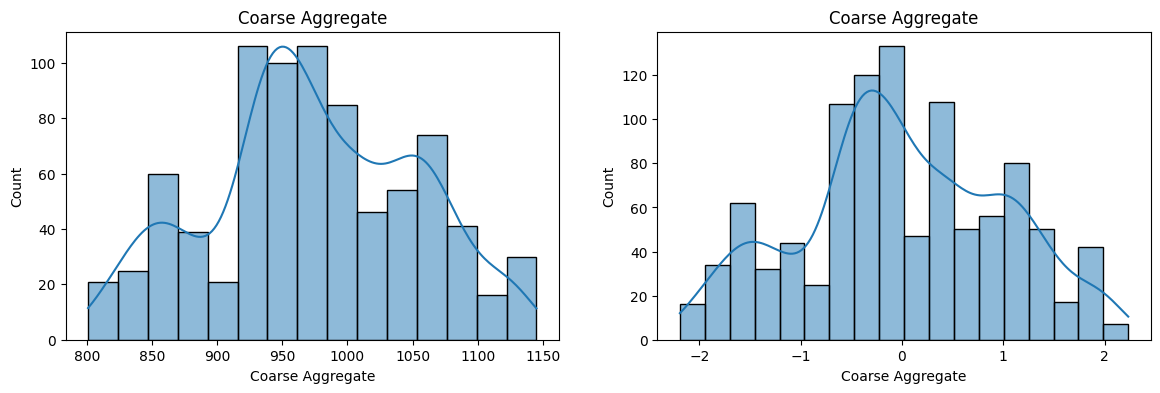

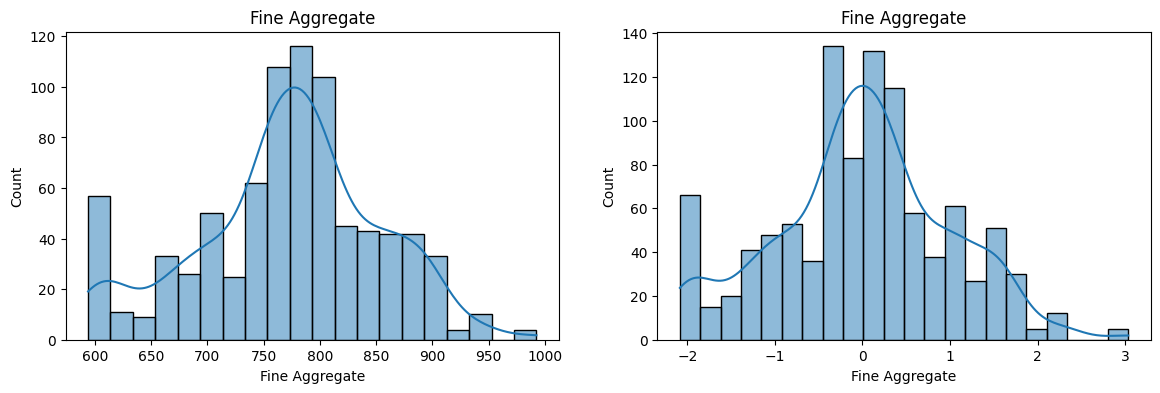

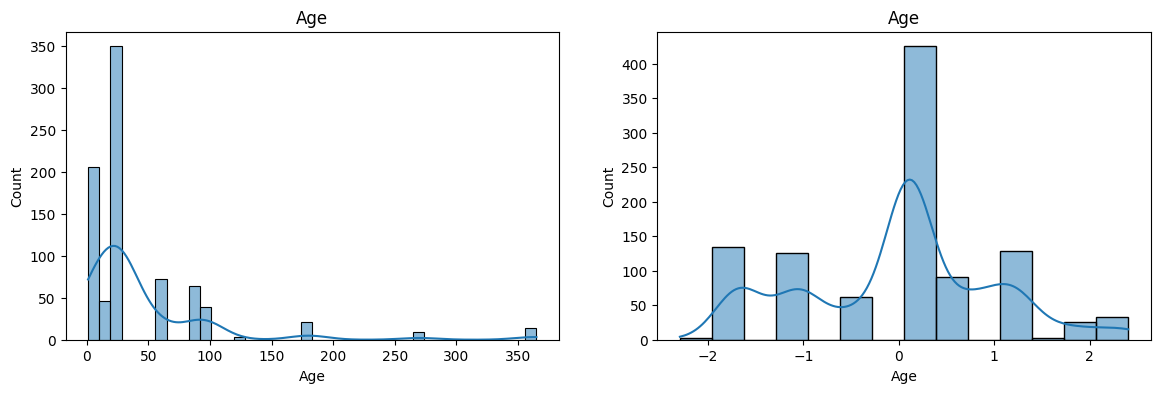

In [ ]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)
for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed2[col],kde=True)
    plt.title(col)

    plt.show()

In [ ]:
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.172271,0.174348
1,Blast Furnace Slag,0.025273,0.015715
2,Fly Ash,-0.032412,-0.161447
3,Water,0.809568,0.771307
4,Superplasticizer,0.099711,0.253935
5,Coarse Aggregate,1.129168,1.130050
6,Fine Aggregate,1.829625,1.783100
7,Age,0.048975,0.019885
